#### authors: Robert Simari and John Joyce
#### date: 4/14/18

# Question 1
## Goal: Use delta training rule to learn -2 + x<sub>1</sub> + x<sub>2</sub> < 0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Generate Data Set

# first randomly select x_1 and x_2 training values uniformly from -1000 to 1000
low = -1000
high = 1000
size = 5000
x_1 = np.random.uniform(low, high, size)
x_2 = np.random.uniform(low, high, size)

x = [[x_1[i], x_2[i]] for i in range(len(x_1))]

# define target function f
##### Is this supposed to be a boolean function? or a surface with two inputs? #####
def f(x1, x2):
    if -2 + x1 + x2 < 0:
        return 1
    return 0

# generate output for generated inputs
y = [f(x_1[i], x_2[i]) for i in range(size)]

# adds output as last element in list of values for each instance
data = [x[i] + [y[i]] for i in range(len(x))]


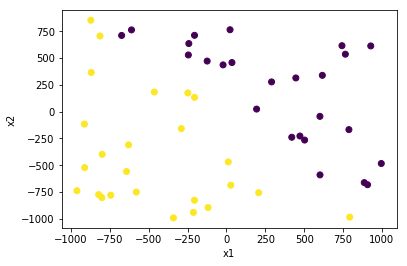

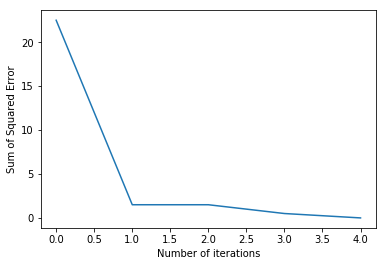

In [50]:
# define gradient descent logic
# @params: 2D array [[feature_vals,...,output]], float, int
# @return: array of weights ?? 
def gradient_descent(training_examples, learning_rate, max_rounds = 100):
    num_features = len(training_examples[0]) - 1
    # initialize weights to a small random values
    weights = np.random.uniform(0, 0.5, num_features)
    ss_error = []
    for r in range(max_rounds): 
        # intialize all delta weights to 0
        delta_w = [0 for _ in range(num_features)]
        partial_errs = []
        # compute delta weights for each training example
        for instance in training_examples:
            target = instance[-1]
            output = sum([i * j for i,j in zip(weights, instance[:-1])]) > 0
            for i in range(len(delta_w)):
                delta_w[i] = delta_w[i] + learning_rate * (target - output) * instance[i]
            partial_errs.append((target-output) ** 2)
        for i in range(len(weights)):
            weights[i] = weights[i] + delta_w[i]
        ss_error.append((r, sum(partial_errs) / 2))
        if sum(partial_errs) / 2 == 0: break
    return ss_error, weights
        
# TODO: plot decision surface ... generate random inputs and color the 0's one color and 1's another color

ss_error, weights = gradient_descent(data, 0.01)

# Decision Surface
classes = []
for instance in data:
    output = sum([i * j for i,j in zip(weights, instance[:-1])]) > 0
    classes.append(output)

plt.scatter([x[0] for x in data], [x[1] for x in data], c=classes)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# this expects the ss_error to be: [iteration_num, error_val]
plt.plot([x[0] for x in ss_error], [y[1] for y in ss_error])
plt.xlabel('Number of iterations')
plt.ylabel('Sum of Squared Error')
plt.show()
    

# Question 2

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind

In [48]:
# read in data from files
f = open('ism.data', 'r')
body_lines = f.readlines()
x = []
y = []
for line in body_lines:
    spl_line = line.rstrip().split(',')
    x.append([float(i) for i in spl_line[:-1]])
    y.append(spl_line[-1])

# split data into training and testing sets, not sure if we need this
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 7)
    
# create neural network classifier
nn_classifier = MLPClassifier()

# create decision tree classifier
dt_classifier = DecisionTreeClassifier()

# use 10-fold cross validation to compare classifiers
nn_scores = cross_val_score(nn_classifier, x, y, cv = 10)
#print("Neural Network Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
dt_scores = cross_val_score(dt_classifier, x, y, cv = 10)
#print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

# determines which model is better with 95% CI using error as metric using AUC or F-measure?
stat, pvalue = ttest_ind(nn_scores, dt_scores)

Ttest_indResult(statistic=1.282594455603326, pvalue=0.21590559350128047)